# Bakgrund

__I machinelearning exemplet så tog vi fram en modell med logistisk regression. I princip gjorde vi ett minimum av beskrivande statistik. Vi läste in datat och tryckte på med modellen. Om det inte finns något behov av att förstå modellen så är denna metodik OK. Dock är oftast en bra idé att först börja med ett grundläggande arbete med att på olika sätt förstå sitt data. Oftast är det denna del som tar 80% av arbetet för en analytiker: att förstå och transformera datat till ett sådant skick att man kan applicera en modell på det. För att kunna fungera som en självgående Data Scientist måste man kunna arbeta med data. Nedan förslag på några övningar där vi praktiserar de exempel som jag visade i tidigare notebooks. Vi använder samma data som i machinelearning exemplet men nu gör vi det nödvändiga förarbetet. I notebooken Veteran_charity_solutions ligger exempel på hur man kan lösa dessa uppgifter.__

__En mycket bra resurs att söka hjälp i är pandas egen dokumentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sas.html__

__I Table of Contents finns "Comparison with SAS". I denna så jämför man pandas med SAS utifrån flera olika perspektiv. Jag brukar alltid ha den öppen när jag arbetar med analys i pandas__



__The veteran dataset contains 44 variables that describes the features for givers and non-givers for a charity campaign. The label that defines a donation is Target_B.__ 


- Target_B = 1: Donation
- Target_B = 0: No donation 

__Vi genomför ett antal övningar för att ta fram beskrivande statistik__

__1. Börja med att importera nödvändiga moduler: pandas, numpy och matplotlib__

In [1]:
# Först importerar vi nödvändiga moduler
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt 

__2. Importera veteran_brutto.csv med lämplig pandas funktion Använd head() metoden för att titta på datat__

In [2]:
df = pd.read_csv("veteran_brutto.csv" )
df.head()

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,PER_CAPITA_INCOME
0,0,101,87.0,0,?,?,.,H,M,2.0,...,8.49,15.0,20.0,5.0,15.0,5,12,26,92,11855
1,1,137,79.0,0,R,2,45,H,M,7.0,...,14.72,20.0,25.0,5.0,17.0,7,21,7,122,10385
2,0,113,75.0,0,S,1,11,H,F,5.0,...,16.75,23.0,28.0,5.0,19.0,11,32,6,105,30855
3,0,92,NaN,0,U,2,04,H,F,6.0,...,11.76,14.0,17.0,3.0,15.0,11,33,6,92,16342
4,0,101,74.0,0,R,2,49,U,F,2.0,...,8.83,20.0,25.0,5.0,25.0,6,19,18,92,12107


__3. Ta fram information om variablerna. Använd info() metoden__

In [3]:
# Information om dataframen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TARGET_B                    19372 non-null  int64  
 1   MONTHS_SINCE_ORIGIN         19372 non-null  int64  
 2   DONOR_AGE                   14577 non-null  float64
 3   IN_HOUSE                    19372 non-null  int64  
 4   URBANICITY                  19372 non-null  object 
 5   SES                         19372 non-null  object 
 6   CLUSTER_CODE                19372 non-null  object 
 7   HOME_OWNER                  19372 non-null  object 
 8   DONOR_GENDER                19372 non-null  object 
 9   INCOME_GROUP                14980 non-null  float64
 10  PUBLISHED_PHONE             19372 non-null  int64  
 11  OVERLAY_SOURCE              19372 non-null  object 
 12  MOR_HIT_RATE                19372 non-null  int64  
 13  WEALTH_RATING               105

__4. Variabeln DONOR_AGE innehåller missing. Idenfiera missing och ersätt med medianen för DONOR_AGE. SciKit modulen innehåller en metod för detta men nu ska vi göra det i pandas__
* Beräkna medianen för DONOR_AGE, referera med variabeln med_age
* Imputera med_age på de rader i dataframen som innehåller missing NaN
* Använd lämplig metod på df['DONOR_AGE'] för att beräkna median värdet
* För att ersätta missing, använd metoden fillna(). Checka hjälpen med ?dataframe.fillna för att se vilket argument som ska skickas in
* Checka med info() metoden igen att variabeln inte innehåller missing

In [4]:
med_age = df['DONOR_AGE'].median() 

In [5]:
df['DONOR_AGE'] = df['DONOR_AGE'].fillna(med_age)

In [6]:
df[['TARGET_B','DONOR_AGE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TARGET_B   19372 non-null  int64  
 1   DONOR_AGE  19372 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 302.8 KB


__5. Hur många har donerat, respektive inte donerat? Använd value_counts() metoden__

In [7]:
df['TARGET_B'].value_counts()

0    14529
1     4843
Name: TARGET_B, dtype: int64

__6. Andel donatorer i datat? Dela med antalet observationer i dataframen - len() metoden__

In [8]:
df['TARGET_B'].value_counts()/len(df)

0    0.75
1    0.25
Name: TARGET_B, dtype: float64

__7. Fördelning kön totalt i datasetet? Vad är konstigt här?__

In [9]:
df['DONOR_GENDER'].value_counts()

F    10401
M     7953
U     1017
A        1
Name: DONOR_GENDER, dtype: int64

__8. Filtrera bort de som inte är män eller kvinnor. Använd sedan den skapade dataframen i de fortsatta övningarna. Räkna antalet observationer i den filtrerade dataframen med len() funktion__

__För att checka ett bolean uttryck i en lista så används isin() metoden som appliceras mot vald variabel och checkas mot en lista__

In [10]:
df_subset = df[df['DONOR_GENDER'].isin(['F','M'])]

In [11]:
len(df_subset)

18354

__9. Hur ser fördelningen ut för de som donerat mellan män och kvinnor?. Använd dataframen du skapade ovan__
__Filtrera på TARGET_B, välj sedan metoden value_counts()__

In [12]:
df_subset[df_subset['TARGET_B'] == 1]['DONOR_GENDER'].value_counts()

F    2609
M    1962
Name: DONOR_GENDER, dtype: int64

__10. Finns det någon skillnad i inkomst per capita för de som donerar eller ej?__
__Gruppera på TARGET_B, applicera sedan mean() metoden på det grupperade objektet. Glöm inte av välja variabel att applicera metoden på__

In [13]:
round(df_subset.groupby('TARGET_B')['PER_CAPITA_INCOME'].mean())

TARGET_B
0    15642.0
1    16509.0
Name: PER_CAPITA_INCOME, dtype: float64

__11. Skapa ett grupperat objekt på 'DONOR_GENDER' och 'TARGET_B'. Referera objekted med variabeln grouped_gen_target__

In [14]:
grouped_gen_target = df_subset.groupby(['DONOR_GENDER','TARGET_B'])

__12. Apply-Split-Combine. Använd agg metoden för att ta fram medelvärde, min och max för per capita income  på det grupperade objektet  grouped_gen_target__

In [15]:
grouped_gen_target['PER_CAPITA_INCOME'].agg(['mean','max','min'])

mean     max  min
DONOR_GENDER TARGET_B                           
F            0         15594.555441  106273    0
             1         16309.715983  130295    0
M            0         15704.493073   90600    0
             1         16773.274210  174523    0

__13. Lägg till variabeln MEDIAN_HOUSEHOLD_INCOME i uttrycket ovan__

In [16]:
grouped_gen_target[['PER_CAPITA_INCOME','MEDIAN_HOUSEHOLD_INCOME']].agg(['mean','max','min'])

PER_CAPITA_INCOME             MEDIAN_HOUSEHOLD_INCOME  \
                                   mean     max min                    mean   
DONOR_GENDER TARGET_B                                                         
F            0             15594.555441  106273   0              336.184292   
             1             16309.715983  130295   0              345.305481   
M            0             15704.493073   90600   0              341.931230   
             1             16773.274210  174523   0              364.137615   

                                 
                        max min  
DONOR_GENDER TARGET_B            
F            0         1500   0  
             1         1500   0  
M            0         1500   0  
             1         1500   0

__14. Vilket kluster har den högsta andelen givare? När man gör en statistisk modell börjar man alltid med att titta på sitt data. Machinelaerning handlar mer om att cruncha data och få fram något som fungerar. Vad som driver modellen kan i många fall bli svårt att förstå. Syftet med denna övning är att ta fram andelen donatorer i varje kluster och sedan plocka fram de fem kluster med högst andel. Här kommer vi att använda metoder som är lite nya. Man kan säkert lösa detta på flera sätt. Nedan lite hjälp som visar hur jag gjorde det__
* Skapa två dataframes - ett som innehåller totala antalet personer i varje kluster och ett som innehåller antalet donatorer
* För att göra detta använd metoden value_counts på 'CLUSTER_CODE'. Det som returneras är en serie. Konvertera denna serie med metoden to_frame()
* Den returnerade dataframen kommer att vara indexerad på klusterkod
* Döp om variabeln 'CLUSTER_CODE' i respektive frame för att kunna merga dem. Läs i Pandas dokumentationen för hur detta går till: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename
* Merga dina två dataframes på index. Då använder man inte ON argumentet- Titta på hjälpen för detta ?df.merge(). Två av argumenten är left_index samt right_index.
* När dataframsen är mergade så skapa en ny variabel som innehåller andel donatorer per kluster
* Sortera dataframen på denna skapae varibel. Använd metoden sort_values(). Tänk på att du vill ta fram de fem kluster med högst andel. Tips ?df.sort_values() och titta på argumenten

__14.1 Skapa två dataframes__

In [17]:
n_cluster = df['CLUSTER_CODE'].value_counts().to_frame()
n_cluster.head()

,CLUSTER_CODE
40,830
24,795
35,727
36,716
49,675


In [18]:
n_cluster_1 = df[df['TARGET_B'] == 1]['CLUSTER_CODE'].value_counts().to_frame()
n_cluster_1.head()

,CLUSTER_CODE
40,235
24,216
35,202
36,185
13,171


__14.2 Döp om variablerna för att kunna merga__

In [19]:
n_cluster_1 = n_cluster_1.rename(columns= {'CLUSTER_CODE':'Donation'})
n_cluster = n_cluster.rename(columns= {'CLUSTER_CODE':'TOTAntal'})


In [20]:
?n_cluster.merge

In [21]:
merged_df = n_cluster.merge(n_cluster_1, left_index = True, right_index = True)
merged_df.head()

,TOTAntal,Donation
40,830,235
24,795,216
35,727,202
36,716,185
49,675,148


__14.3 Beräkna andelen som en kvot__

In [22]:
merged_df['Andel'] = merged_df['Donation'] / merged_df['TOTAntal']
merged_df.head()

,TOTAntal,Donation,Andel
40,830,235,0.283133
24,795,216,0.271698
35,727,202,0.277854
36,716,185,0.258380
49,675,148,0.219259


__14.5 Sortera dataframen på den skapade variabeln ovan. Obs - vi vill se de 5 klustren med högsta andel__

In [23]:
?merged_df.sort_values

In [24]:
merged_df.sort_values('Andel', ascending=False).head()

,TOTAntal,Donation,Andel
28,343,109,0.317784
.,454,140,0.308370
13,579,171,0.295337
20,317,93,0.293375
53,303,88,0.290429


__15. Skapa en graf som innehåller två liggande stapeldiagram som ligger under varandra__

* Titta på fördelningen av 'URBANICITY' samt 'OVERLAY_SOURCE' med value_counts() metoden. Det är dessa fördelningar vi ska visulalisera och koden för detta återanvänder vi när vi bygger grafen
* Skapa ett objekt från plt.figure() metoden. Sätt storlek för hela grafen till 14,9
* Skapa två objekt (subplot objekt) som delar in grafen i två ytor med metoden add_subplot(rader, kolumner, nummer på subplot). Objektet som metoden ska appliceras på är objektet från plt.figure() metoden
* Återanvänd visualiseringen i första punkten och referera med med två olika variabelnamn
* Applicera plot() metoden på objekten ovan. Sätt argument som skapar horisntell graf
* Sätt två olika titlar på graferna. Använd metoden set_title() på de två olika subplott objekten
* Kan man ändra färg på staplarna? Checka dokumentationen för **kwargs: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [25]:
df['URBANICITY'].value_counts()

S    4491
C    4022
R    4005
T    3944
U    2456
?     454
Name: URBANICITY, dtype: int64

In [26]:
df['OVERLAY_SOURCE'].value_counts()

B    8732
P    4768
N    4392
M    1480
Name: OVERLAY_SOURCE, dtype: int64

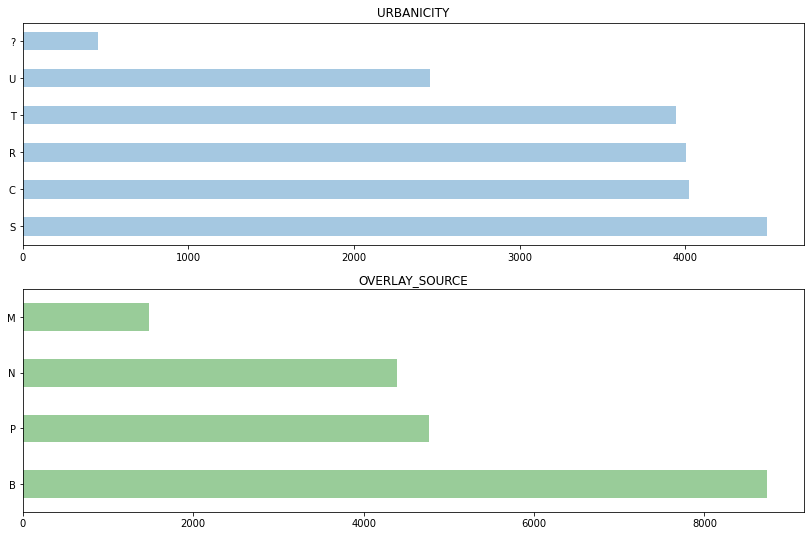

In [28]:
fig = plt.figure(figsize = (14,9))
# Skapar grafobjekt som ska läggas in i arean ovan
# Graf1
ax1 = fig.add_subplot(2,1,1)
# Graf2
ax2 = fig.add_subplot(2,1,2)

ax1.set_title('URBANICITY')
ax2.set_title('OVERLAY_SOURCE')

chart1 = df['URBANICITY'].value_counts()
chart2 = df['OVERLAY_SOURCE'].value_counts()

chart1.plot(kind='barh', ax = ax1, rot = 0, grid = False, alpha = 0.4)

chart2.plot(kind='barh', ax = ax2, rot = 0, grid = False, alpha = 0.4, color = 'green')

plt.show()

In [30]:
chart2.plot?